# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)



In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

Question 6: Coding Life in Lower Dimensions

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA.

6a) Code up and run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.

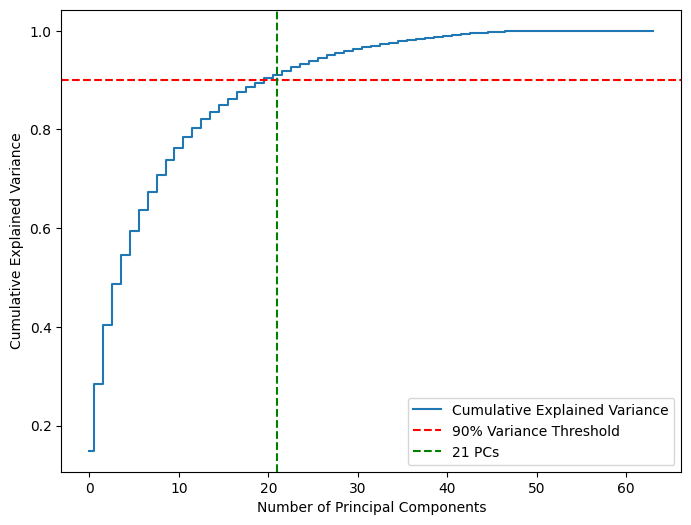

In [152]:
# Cell type : CodeWrite
# Write the function for PCA here.
def computePCA(Data, M=None):
    """ Compute the principal components of the dataset of dimension N X D (n_samples x n_features)
    Feel free to modify the function arguments and outputs to your needs, but we will provide some recommendations here.

    Arguments:
    Data: Dataset
    M: If not provided, return all the principal components (PCs). If provided, return only the top M PCs.

    Returns:
    transformed_D: transformed (reconstructed) data using top M PCs.
    components:
    explained_variation: of each component
    numTopPCs: if M=None, provides minimum number of principal components that contribute to at least 90% of variance in the dataset.
    """

    #your code here
    data = Data
    N, D = data.shape
    mean = np.mean(data, axis=0).reshape(-1, 1)
    data_meaned = data - mean.T # 
    # print(data_meaned.shape, mean.shape)
    covariance_matrix = data_meaned.T @ data_meaned / N
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    explained_variation = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    if M is not None:
        transformed_D = data_meaned @ sorted_eigenvectors[:, :M] @ sorted_eigenvectors[:, :M].T + mean.T
        components = sorted_eigenvectors[:, :M] 
        numTopPCs = M
    else:
        cumulative_variance = np.cumsum(explained_variation)
        numTopPCs = np.searchsorted(cumulative_variance, 0.9) + 1
        transformed_D = data_meaned @ sorted_eigenvectors[:, :numTopPCs] @ sorted_eigenvectors[:, :numTopPCs].T + mean.T
        components = sorted_eigenvectors[:, :numTopPCs] 

    return transformed_D, components, explained_variation, numTopPCs

image_data = np.load('data/Data.npz')
lst = image_data.files
transformed_D, components, explained_variation, numTopPCs = computePCA(image_data[lst[0]], M=None)
plt.figure(figsize=(8, 6))
plt.step(range(0,len(explained_variation)), np.cumsum(explained_variation), where='mid', label='Cumulative Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.axvline(x=numTopPCs, color='g', linestyle='--', label=f'{numTopPCs} PCs')
plt.legend()
plt.savefig('plots/explained_variance.pdf')
plt.show()

6b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

In [ ]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for selecting the number of dimensions.

transformed_D, components, explained_variation, numTopPCs = computePCA(image_data[lst[0]], M=None)
transformed_D_2, components_2, explained_variation_2, numTopPCs_2 = computePCA(image_data[lst[0]], M=2)
transformed_D_4, components_4, explained_variation_4, numTopPCs_4 = computePCA(image_data[lst[0]], M=4)
transformed_D_8, components_8, explained_variation_8, numTopPCs_8 = computePCA(image_data[lst[0]], M=8)
transformed_D_16, components_16, explained_variation_16, numTopPCs_16 = computePCA(image_data[lst[0]], M=16)
transformed_D_all, components_all, explained_variation_all, numTopPCs_all = computePCA(image_data[lst[0]], M=image_data[lst[0]].shape[1])

mse_2 = np.mean((image_data[lst[0]] - transformed_D_2)**2)
mse_4 = np.mean((image_data[lst[0]] - transformed_D_4)**2)
mse_8 = np.mean((image_data[lst[0]] - transformed_D_8)**2)
mse_16 = np.mean((image_data[lst[0]] - transformed_D_16)**2)
mse_none = np.mean((image_data[lst[0]] - transformed_D)**2)
mse_all = np.mean((image_data[lst[0]] - transformed_D_all)**2)

print(f'MSE for M=2: {np.round(mse_2, 6)}, M=4: {np.round(mse_4, 6)}, M=8: {np.round(mse_8, 6)}, M=16: {np.round(mse_16, 6)}, M=90%variance: {np.round(mse_none, 6)}, M=all: {np.round(mse_all, 6)}')
image_data.close()

MSE for M=2: 13.421012, M=4: 9.627986, M=8: 6.121793, M=16: 2.827183, M=90%variance: 1.817265, M=all: 0.0


 6c) Let's now apply the same code that you've written above to analyze images to understand text. Large language models (LLMs) typically analyze text by representing words as vectors, also known as embeddings. You are provided with 768-dimensional embeddings (extracted from a LLM called BERT) of 10 words in the [folder](https://drive.google.com/drive/folders/1yshmnkWoALf2ZwqgZqWwXJk2W5_XuCLG?usp=sharing).

 Apply your PCA code with $M=2$ principal components on these embeddings to visualize the 10 words in 2-D. Report how much percentage of variation is captured by these two principal components. What does this visualization tell you about the embeddings of related vs.~unrelated words?

 (Note: If applying the same code to your data matrix takes a long time, then consider applying it to the transpose of the data matrix and use the output PCs to derive the PCs of the original matrix as in Q3 of the Assignment.)

Percentage of variation captured by the first 2 PCs: 45.47%


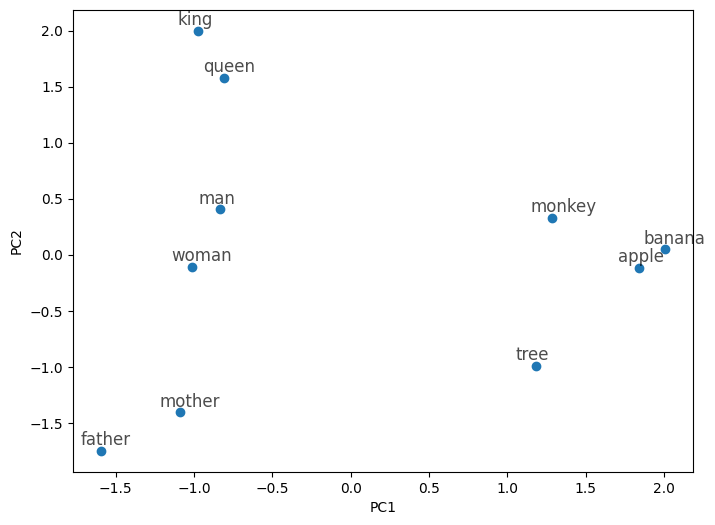

In [160]:
# Cell type : CodeWrite
# (Use the function written previously)

# --- Data loading is correct ---
embeddings = {}
words = []
with open("data/prml_asst_2_word_embeddings.txt", "r") as f:
    for line in f:
        tokens = line.strip().split()
        word = tokens[0]
        vector = [float(x) for x in tokens[1:]]
        embeddings[word] = vector
        words.append(word)

text_data = np.array(list(embeddings.values()))

# --- Apply PCA to get components ---
# We only need the components, not the reconstructed data
_, components_text, explained_variation_text, _ = computePCA(text_data, M=2)

# --- 1. Report the captured variance ---
captured_variance = np.sum(explained_variation_text[:2])
print(f"Percentage of variation captured by the first 2 PCs: {captured_variance:.2%}")

# --- 2. Project the data into 2D for visualization ---
# Center the data first
mean_text = np.mean(text_data, axis=0)
text_data_meaned = text_data - mean_text
# Project onto the top 2 components
projected_text = text_data_meaned @ components_text

# --- 3. Create the 2D visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(projected_text[:, 0], projected_text[:, 1])

# Add word labels to each point
for i, word in enumerate(words):
    plt.annotate(word, (projected_text[i, 0], projected_text[i, 1]), fontsize=12, alpha=0.7, xytext=(-15, 4), textcoords='offset points')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('plots/word_embeddings_pca.pdf')
plt.show()